In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, norm, binom

In [ ]:
df = pd.read_csv("customer_data.csv")
df.head()

,Unnamed: 0,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False
1,1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True
2,2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False
3,3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False
4,4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True


### Questão 1 [valor: 0,8]
Considere o dataset customer_data. Neste dataset, os clientes são classificados de acordo com a renda (income). Obtenha para o income "working class", as seguintes informações: \
A) O menor credit_score. \
B) O maior credit_score. \
C) O credit_score médio. \
D) O desvio padrão do credit_score.

In [ ]:
df2 = df[df['income'] == 'working class']
print(df2['credit_score'].min())
print(df2['credit_score'].max())
print(df2['credit_score'].mean())
print(df2['credit_score'].std())

0.1237946155140384
0.7170914771884047
0.43192928411686077
0.08823356149104253


### Questão 2
A coluna education do dataset customer_data possui 3 valores possíveis: university, high shool e none (nenhum). Compare por meio de um gráfico contendo dois boxplots, o credit_score de quem fez universidade e de quem não completou o ensino médio (none).

<Axes: title={'center': 'credit_score'}, xlabel='education'>

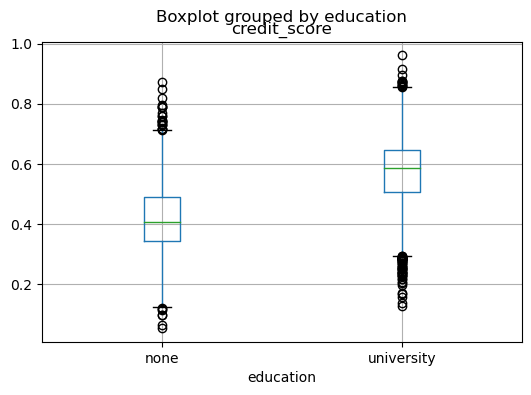

In [ ]:
plt.rcParams["figure.figsize"] = [6,4]
df2 = df[df['education'].isin(['university','none'])]
df2.boxplot(by ='education', column =['credit_score'])

### Questão 3
Gere um gráfico que mostre a quantidade de pessoas com zero, uma, duas, três, ... violações de excesso de velociadade (speeding violations).

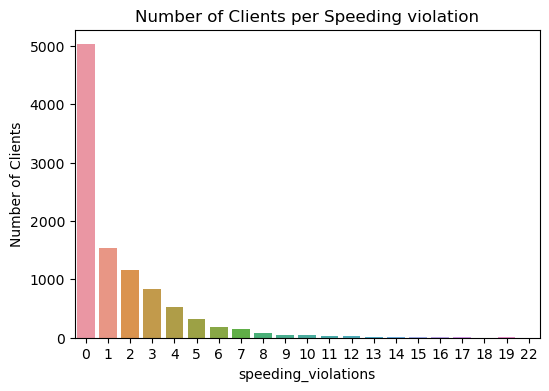

In [ ]:
#Create a countplot to visualize the count of each category in the gender column.
sns.countplot(data=df,x="speeding_violations")
plt.title("Number of Clients per Speeding violation")
plt.ylabel("Number of Clients")
plt.show()

### Questão 4
Nesta questão queremos comparar o perfil de renda (income) dos motoristas que cometem mais infrações de excesso de velocidade (speeding_violations). Você deve mostrar dois gráficos de pizza lado a lado, o primeiro contendo o perfil de renda dos clientes que possuem até 5 speeding_violations, e o segundo contendo o perfil de renda dos clientes que possuem mais de 5 speeding_violations. \
Dica: use value_conts(normalize=True) \
Exemplo: data = df['xxxxxx'].value_counts(normalize=True)

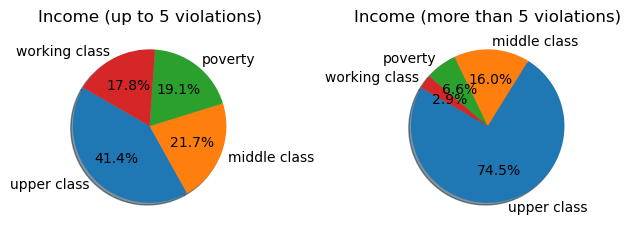

In [ ]:
df2 = df[df['speeding_violations'] <= 5]
df3 = df[df['speeding_violations'] > 5]

#Define column to use
data1 = df2["income"].value_counts(normalize=True)
data2 = df3["income"].value_counts(normalize=True)
labels = ["upper class","middle class","poverty","working class"]

plt.subplot(1,2,1)
plt.pie(data1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("Income (up to 5 violations)")
plt.subplot(1,2,2)
plt.pie(data2, labels=labels, autopct ='%1.1f%%', shadow=True, startangle=150)
plt.title("Income (more than 5 violations)")
plt.tight_layout()
plt.show()

### Questão 5
O objetivo dessa questão é entender a relação entre a experiência do motorista (driving_experience) e quantidade de violações (speeding_violations) registradas. Elabore um gráfico que permita realizar esta comparação.

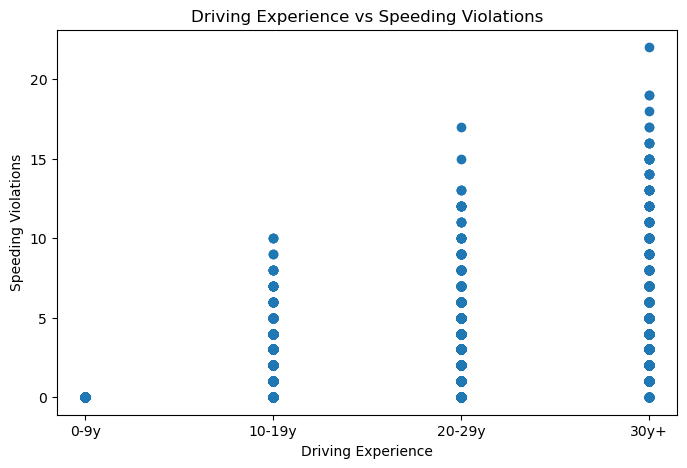

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(data=df,x="driving_experience",y="speeding_violations")
plt.title("Driving Experience vs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Driving Experience")
plt.show()

### Questão 6
João está a procura de um restaurante para almoçar. Sabe-se que naquela região da cidade, existem em média 2 restaurantes por km quadrado. Calcule a probabilidade de se encontrar 1, 2, ..., 10 restaurantes num raio de 5 km. Plote um gráfico que exiba essas probabilidades.

[0.000454   0.00227    0.00756665 0.01891664 0.03783327 0.06305546
 0.09007923 0.11259903 0.12511004 0.12511004]


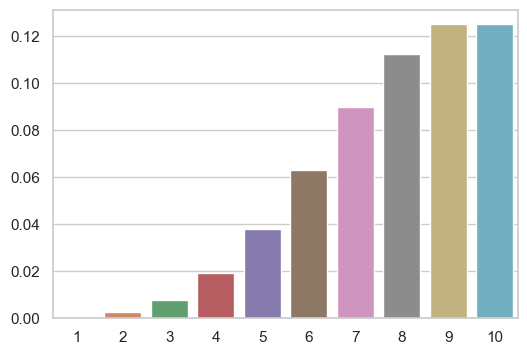

In [ ]:
eixo_x = np.arange(1, 11)
eixo_y = poisson.pmf(eixo_x, 10)
print(eixo_y)
sns.set_theme(style='whitegrid')
sns.barplot(x=eixo_x, y=eixo_y)
plt.show()

### Questão 7
A altura dos homens de uma determinada região é normalmente distribuída, com média de 175 cm e desvio padrão de 7,1 cm. A altura das mulheres dessa mesma região é também normalmente distribuída, com média 162 cm e desvio padrão 6,4 cm. \
A) Qual a porcentagem de homens que vão precisar abaixar a cabeça para passar por uma porta de 183 cm de altura? \
B) Qual a porcentagem de mulheres que vão precisar abaixar a cabeça para passar por uma porta de 183 cm de altura? \
C) Qual altura da porta permitiria que pelo menos 95% dos homens passassem pela porta sem se abaixar?

In [ ]:
#A
print(norm.sf(183, 175, 7.1) * 100)
#B
print(norm.sf(183, 162, 6.4) * 100)
#C
print(norm.ppf(0.95, 175, 7.1))

12.992186423201957
0.05167404839400355
186.67846075135546


### Questão 8
Um teste de múltipla escolha apresenta 4 opções por questão, e 14 questões. Se a aprovação depende de 9 ou mais respostas corretas: \
a) qual a probabilidade de um estudante que responde “no chute” ser aprovado? \
b) se 500 estudantes fazem o teste, qual o número esperado de estudantes aprovados, tendo “chutado” as respostas?

In [ ]:
#A
print(binom.sf(8, 14, 0.25))
#B
print(500 * binom.sf(8, 14, 0.25))

0.002154175192117691
1.0770875960588455


### Questão 9
Uma fábrica engarrafa bebidas contendo 600 ml e desvio padrão de 12 ml. Um lote de 1000 garrafas foi produzido. Sem utilizar a linguagem Python, informe: \
A) A quantidade de garrafas contendo mais de 612 ml. \
B) A quantidade de garrafas contendo entre 588 e 624 ml. \
Exemplique como chegou nesses resultados. Lembre-se que não é permitido obter a resposta usando funções do Python.

## Fórmula Z SCORE

\\[Z = \frac{X - \mu}{\sigma} \\]

Onde:

X: valor observado

μ: média

σ: desvio padrão

**1. Padronizando:** \\[ Z = \frac{X - \mu}{\sigma} = \frac{612 - 600}{12} = 1 \\] **2. Usando a tabela da normal padrão:** \\[ P(Z > 1) = 1 - P(Z \leq 1) = 1 - 0{,}8413 = 0{,}1587 \\] **3. Multiplicando pelo total de garrafas:** \\[ 0{,}1587 \times 1000 = 158{,}7 \Rightarrow \textbf{aproximadamente 159 garrafas} \\] --- ### B) Quantidade de garrafas entre 588 ml e 624 ml Queremos calcular: \\( P(588 < X < 624) \\) **1. Padronizando os limites:** Para 588 ml: \\[ Z = \frac{588 - 600}{12} = -1 \\] Para 624 ml: \\[ Z = \frac{624 - 600}{12} = 2 \\] **2. Usando a tabela da normal padrão:** - \\( P(Z < 2) = 0{,}9772 \\) - \\( P(Z < -1) = 0{,}1587 \\) **3. Calculando a probabilidade:** \\[ P(-1 < Z < 2) = 0{,}9772 - 0{,}1587 = 0{,}8185 \\] **4. Multiplicando pelo total de garrafas:** \\[ 0{,}8185 \times 1000 = 818{,}5 \Rightarrow \textbf{aproximadamente 819 garrafas} \\]

A) 160 garrafas -- temos 16% da área sob a curva normal com valores maiores que 612 \
B) 815 garrafas -- entre 588 e 624 temos 81,5% da área sob a curva normal (-1dp a + 2dp)

In [ ]:
from scipy.stats import norm

# Parâmetros
media = 600       # média (μ)
desvio = 12       # desvio padrão (σ)
total = 1000      # total de garrafas

# A) Garrafas com mais de 612 ml
prob_mais_612 = 1 - norm.cdf(612, loc=media, scale=desvio)
quant_mais_612 = total * prob_mais_612

# B) Garrafas entre 588 ml e 624 ml
prob_entre = norm.cdf(624, loc=media, scale=desvio) - norm.cdf(588, loc=media, scale=desvio)
quant_entre = total * prob_entre

# Resultados
print(f"A) Aproximadamente {quant_mais_612:.0f} garrafas têm mais de 612 ml.")
print(f"B) Aproximadamente {quant_entre:.0f} garrafas têm entre 588 e 624 ml.")